<a href="https://colab.research.google.com/github/KyoungmiKwon/Bigdata_Training_at_ITwill/blob/main/Machine_Learning/ML20_1_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

In [ ]:
(x_tr_f, y_tr_f),(x_ts,y_ts) = keras.datasets.imdb.load_data(num_words=500)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# 어휘 사전을 로드
word_index = keras.datasets.imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
x_tr, x_val, y_tr, y_val = train_test_split(x_tr_f,y_tr_f,
                                            test_size = 0.2,
                                            stratify= y_tr_f,
                                            random_state = 42)

In [ ]:
x_tr_seq = keras.preprocessing.sequence.pad_sequences(sequences=x_tr,maxlen=100)
# pad_sequences() 함수의 parameter:
# maxlen: sequence의 최대 길이
# padding='pre':maxlen보다 길이가 짧은 시쿼스일 때 패딩을 앞에서 부터 채움
# truncating='pre' : maxlen보다 길이가 긴 시퀀스 일 때 앞에서 자름

In [ ]:
x_val_seq = keras.preprocessing.sequence.pad_sequences(sequences=x_val, maxlen=100)
x_val_seq.shape #> (5000,) ---> (5000, 100)

(5000, 100)

In [ ]:
x_ts_seq = keras.preprocessing.sequence.pad_sequences(sequences=x_ts, maxlen=100)
x_ts_seq.shape

(25000, 100)

In [ ]:
md3 = keras.Sequential()
md3.add(keras.layers.Embedding(input_dim=500,output_dim=16, input_length=100))
md3.add(keras.layers.LSTM(units=8))
md3.add(keras.layers.Dense(units=1, activation='sigmoid'))

md3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


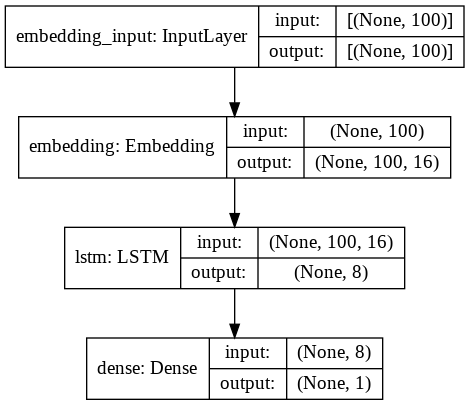

In [ ]:
keras.utils.plot_model(md3,show_shapes=True)

In [ ]:
md3.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
               loss='binary_crossentropy', metrics='accuracy')

In [ ]:
early_stop_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint('lstm_model.h5', save_best_only=True)

In [ ]:
history3 = md3.fit(x_tr_seq,y_tr, batch_size=64, epochs=100,
                   callbacks=[early_stop_cb,checkpoint_cb],
                   validation_data = (x_val_seq,y_val))

Epoch 1/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6913 - accuracy: 0.5754 - val_loss: 0.6904 - val_accuracy: 0.5954
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6879 - accuracy: 0.6191 - val_loss: 0.6859 - val_accuracy: 0.6116
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6799 - accuracy: 0.6446 - val_loss: 0.6741 - val_accuracy: 0.6454
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6539 - accuracy: 0.6794 - val_loss: 0.6173 - val_accuracy: 0.6992
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 0.5635 - accuracy: 0.7306 - val_loss: 0.5439 - val_accuracy: 0.7372
Epoch 6/100
313/313 [==============================] - 2s 7ms/step - loss: 0.5255 - accuracy: 0.7521 - val_loss: 0.5222 - val_accuracy: 0.7530
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 0.5020 - accuracy: 0.7694 - val_loss: 0.5009 - val_accuracy: 0.7714